# Aim:
Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [9]:
! pip install pmdarima

     -------------------------------------- 569.7/569.7 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 988.4/988.4 kB 4.8 MB/s eta 0:00:00


In [10]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
df=pd.read_excel('Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## EDA

In [12]:
df.shape

(96, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [14]:
df.describe(include='all')

,Month,Passengers
count,96,96.000000
unique,96,NaN
top,1995-01-01 00:00:00,NaN
freq,1,NaN
first,1995-01-01 00:00:00,NaN
last,2002-12-01 00:00:00,NaN
mean,NaN,213.708333
std,NaN,71.918216
min,NaN,104.000000
25%,NaN,156.000000


In [15]:
df.set_index('Month', inplace=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [16]:
# Data for models
df['t'] = np.arange(1,97)
df['t_square'] = np.square(df['t'])
df['log_passengers'] = np.log(df['Passengers'])
df

,Passengers,t,t_square,log_passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118
2002-10-01,306,94,8836,5.723585


## Data Visualization

In [17]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 200
sns.set_style('darkgrid')

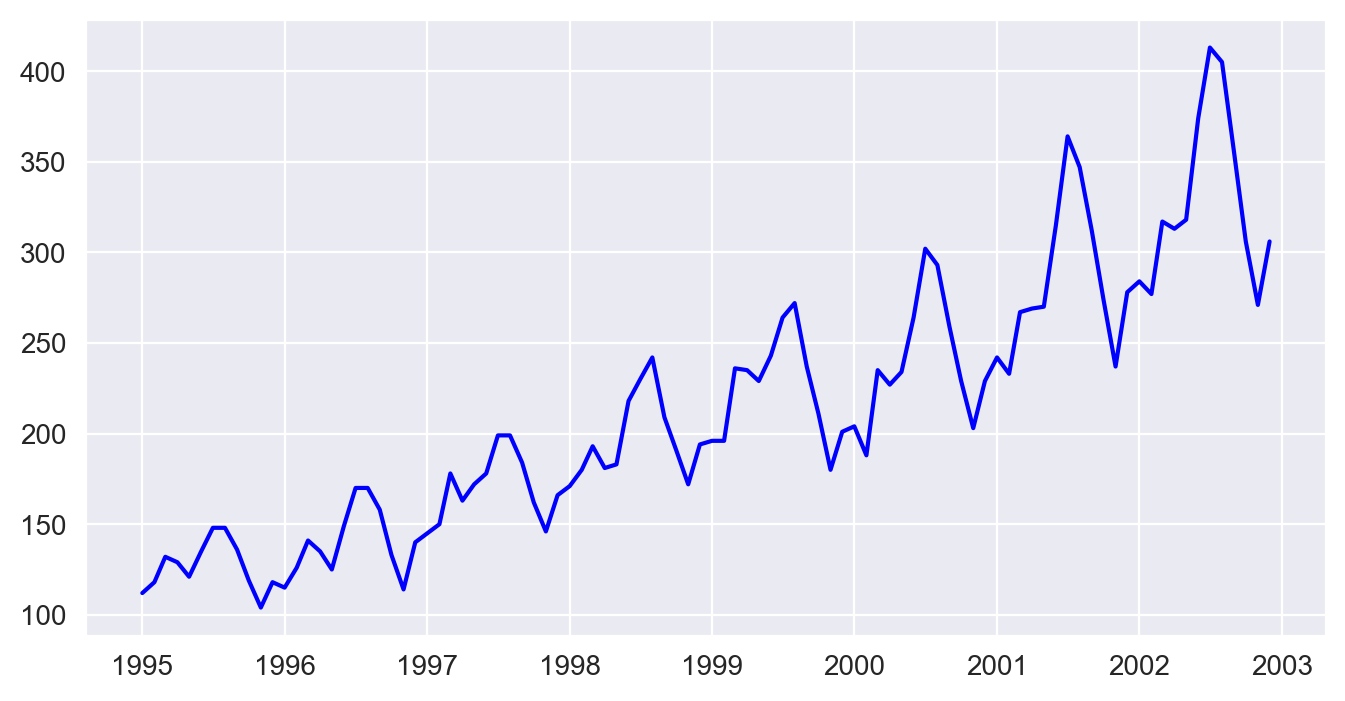

In [18]:
plt.plot(df['Passengers'], c='blue')


<Axes: xlabel='Passengers', ylabel='Count'>

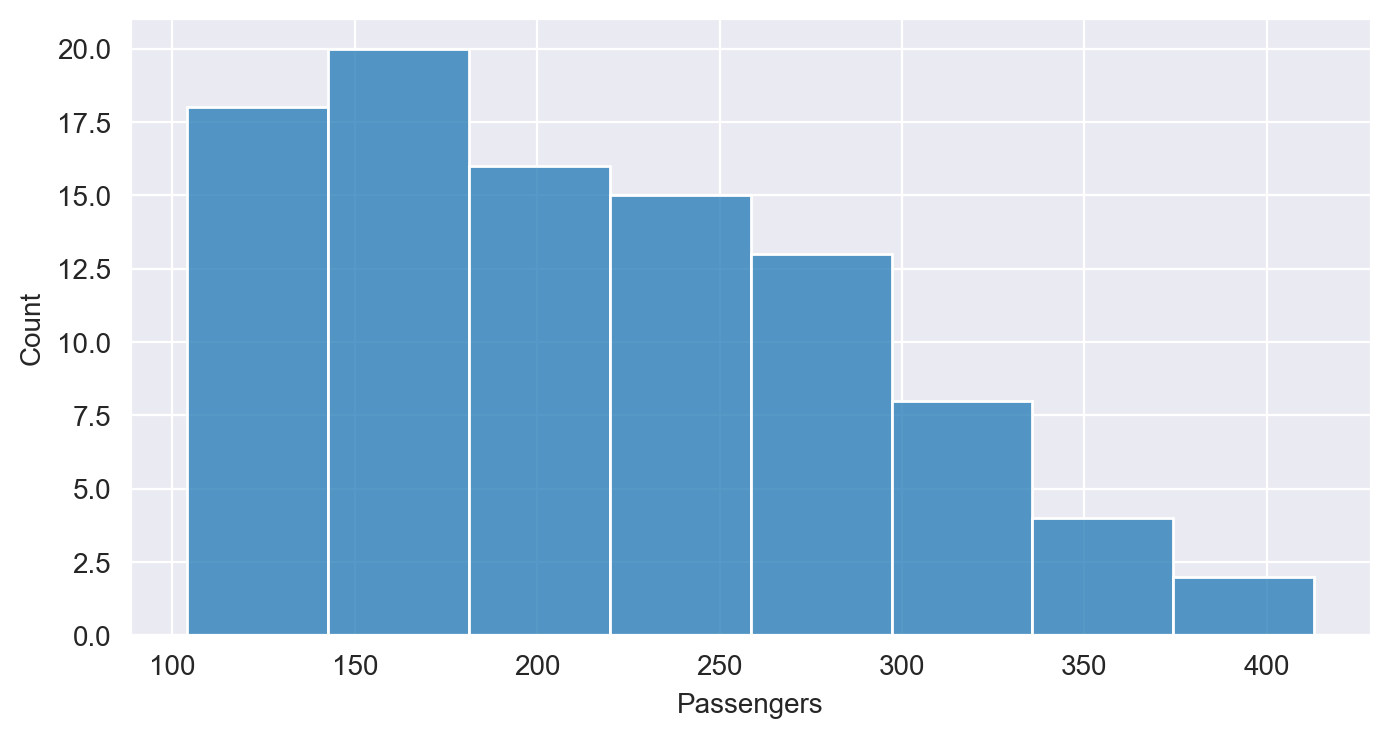

In [19]:
sns.histplot(df['Passengers'])


<Axes: >

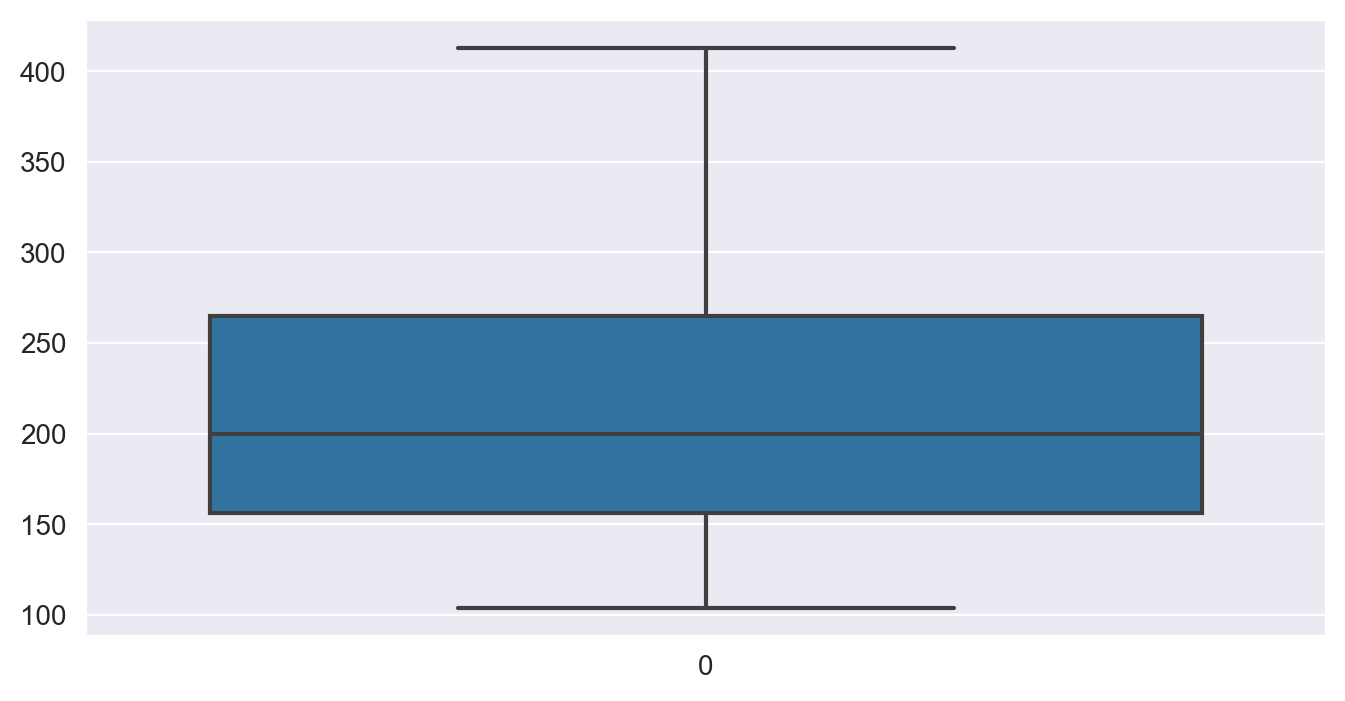

In [20]:
sns.boxplot(df['Passengers'])


<Axes: xlabel='Passengers', ylabel='Density'>

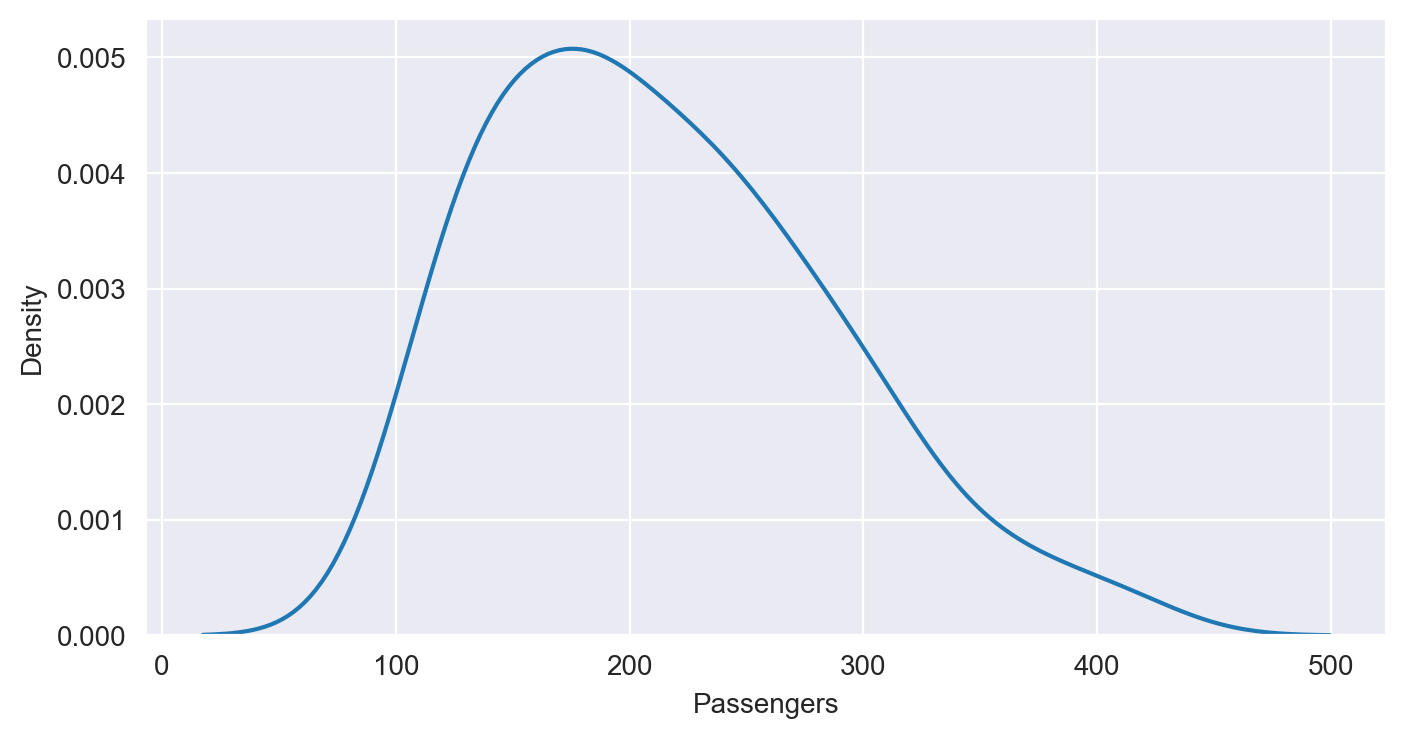

In [21]:
sns.kdeplot(df['Passengers'])


## Spliting Data

In [22]:
x = df.head(80)
y = df.tail(16)

## Model based Forecasting Methods

In [23]:
df.head(2)

,Passengers,t,t_square,log_passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685


## Linear model

In [24]:
linear = smf.ols('Passengers~t', data=x).fit()
pred_linear = pd.Series(linear.predict((y[['t']])))
rmse_linear = np.sqrt(mean_squared_error(y['Passengers'], pred_linear))
rmse_linear

47.54262406772677

## Exponential model

In [25]:
exp = smf.ols('log_passengers~t', data=x).fit()
pred_exp = pd.Series(exp.predict(y[['t']]))
rmse_exp = np.sqrt(mean_squared_error(y['Passengers'], pred_exp))
rmse_exp

312.8892354482463

## Quadratic model

In [26]:
quad = smf.ols('Passengers~t+t_square',data=x).fit()
pred_quad = pd.Series(quad.predict(y[['t', 't_square']]))
rmse_quad = np.sqrt(mean_squared_error(y['Passengers'], pred_quad))
rmse_quad

43.65440369584248

## Dataset type

In [27]:
# p-value
adfuller(df['Passengers'])[1]

0.9968250481137263

### According the p-value, the dataset is not stationary as the p value is greater than alpha value (0.05).

## Arima model

In [28]:
#finding out order of arima
order = auto_arima(df['Passengers'])
order

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [29]:
# Arima model
arima = ARIMA(x['Passengers'], order=(3, 1, 2)).fit()

## Evaluating model

In [30]:
df.shape

(96, 4)

In [31]:
x.shape

(80, 4)

In [32]:
ypred = arima.predict(start=80, end=95)
ypred

2001-09-01    321.684643
2001-10-01    307.973647
2001-11-01    298.508446
2001-12-01    297.633706
2002-01-01    296.318484
2002-02-01    298.350097
2002-03-01    298.005586
2002-04-01    299.412189
2002-05-01    298.757284
2002-06-01    299.555141
2002-07-01    298.872997
2002-08-01    299.433081
2002-09-01    298.888521
2002-10-01    299.338352
2002-11-01    298.924589
2002-12-01    299.286260
Freq: MS, Name: predicted_mean, dtype: float64

In [33]:
y

,Passengers,t,t_square,log_passengers
Month,,,,
2001-09-01,312,81,6561,5.743003
2001-10-01,274,82,6724,5.613128
2001-11-01,237,83,6889,5.468060
2001-12-01,278,84,7056,5.627621
2002-01-01,284,85,7225,5.648974
2002-02-01,277,86,7396,5.624018
2002-03-01,317,87,7569,5.758902
2002-04-01,313,88,7744,5.746203
2002-05-01,318,89,7921,5.762051


In [34]:
rmse_arima = np.sqrt(mean_squared_error(y['Passengers'], ypred))
rmse_arima

50.41648996616517

## Results

In [35]:
data = {
    'Model' : ['Linear model', 'Exponential model', 'Quadratic model', 'Arima model'],
    'RMSE Values' : [rmse_linear, rmse_exp, rmse_quad, rmse_arima]
}
result = pd.DataFrame(data)
result

,Model,RMSE Values
0,Linear model,47.542624
1,Exponential model,312.889235
2,Quadratic model,43.654404
3,Arima model,50.416490


## Building final model with least RMSE value ie. Quadratic model

In [36]:
final_model = smf.ols('Passengers~t+t_square',data=df).fit()
pred_final_model = pd.Series(quad.predict(df[['t', 't_square']]))
rmse_final_model = np.sqrt(mean_squared_error(df['Passengers'], pred_final_model))
rmse_final_model

29.604380873130072

In [37]:
forecast = {
    'Actual' : df['Passengers'],
    'Predicted' : pred_final_model
}
Forecast = pd.DataFrame(forecast)
Forecast

,Actual,Predicted
Month,,
1995-01-01,112,119.217164
1995-02-01,118,120.503952
1995-03-01,132,121.813530
1995-04-01,129,123.145897
1995-05-01,121,124.501053
...,...,...
2002-08-01,405,329.637429
2002-09-01,355,332.998052
2002-10-01,306,336.381463
